In [2]:
import numpy
import pandas as pd
import datetime
from CompBioProject import functions
import matplotlib
import graphviz
%matplotlib inline
import matplotlib.pyplot as plt

This workshop is divided into 5 sections.  In section 1, I will be dicussing data preprocessing. In section 2, I will be discussing regression techniques. In section 3, I will be discussing dimensionality reduction algorithms. In section 4, I will be discussing classification. In section 5, I will be discussing model selection.


All these topics will be taught in Python and use the machine learning package, [scikit-learn](http://scikit-learn.org/).

For sections 1 and 2, I will be using a dataset of avocado prices and volume sold in U.S. cities.

For sections 3,4 and 5, I will be using a dataset of antibotic resistance in gonorrhea strains.

# Avocado U.S. Cities Dataset

The dataset contains avocado prices and total volume sold in U.S. cities. [I obtain the data from the website, Kaggle.](https://www.kaggle.com/neuromusic/avocado-prices-across-regions-and-seasons/data)

In [69]:
avocado_path = '/Users/aarcher/Downloads/avocado.csv'
avocado_df = pd.read_csv(avocado_path,header=0)
avocado_df.drop('Unnamed: 0', axis=1, inplace=True)

The avocado dataset is stored as a [pandas dataframe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html), **avocado_df**.

In [70]:
print('The dataframe has columns: ',avocado_df.columns.values)

The dataframe has columns:  ['Date' 'AveragePrice' 'Total Volume' '4046' '4225' '4770' 'Total Bags'
 'Small Bags' 'Large Bags' 'XLarge Bags' 'type' 'year' 'region']


From Kaggle, the description of the columns are:

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

I load the dataset below and add a column for month of observation. I also print the "head" of the dataset. The head is the first n entries.

In [71]:
month = [int(date[5:7]) for date in avocado_df.loc[:,'Date'].values]
avocado_df.loc[:,'Month'] = month
print(avocado_df.head())

         Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0     8696.87     8603.62       93.25          0.0  conventional  2015   
1     9505.56     9408.07       97.49          0.0  conventional  2015   
2     8145.35     8042.21      103.14          0.0  conventional  2015   
3     5811.16     5677.40      133.76          0.0  conventional  2015   
4     6183.95     5986.26      197.69          0.0  conventional  2015   

   region  Month  
0  Albany     12  
1  Albany     12  
2  Albany     12  
3  Albany     12  
4  Albany     11  


# 1. Preprocessing

In this section, we will be apply the preprocessing techniques:
    
- Normalization
- Standardization
- Label Encoding
- Training-Test Split

to the avocado dataset.

Let's work through the cells below!

### Normalization and Standardization

I create the **total_volume_and_bags** variable to store the Total Volume and Total Bags columns. 

We'll normalize and standardize these columns.

In [72]:
total_volume_and_bags = avocado_df.loc[:,['Total Volume','Total Bags']]
print('The first 5 entries of total volume are:\n',total_volume_and_bags.head()) 

The first 5 entries of total volume are:
    Total Volume  Total Bags
0      64236.62     8696.87
1      54876.98     9505.56
2     118220.22     8145.35
3      78992.15     5811.16
4      51039.60     6183.95


## Exercise 1.1

I have already normalize total_volume_and_bags and print its value. See the below.

Standardize **total_volume_and_bags** using an instance of StandardScaler. Print the standardized variables.

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

normalizer_scaler = Normalizer()
normalized_volume_bags = normalizer_scaler.fit_transform(total_volume_and_bags)
print('The head of the normalized Total Volume and Total Bags are:\n',normalized_volume_bags[0:5,:])
print('\n')
standardized_scaler = StandardScaler()
standardized_volume_bags = standardized_scaler.fit_transform(total_volume_and_bags)
print('The standardized Total Volume and Total Bags are:\n',standardized_volume_bags[0:5,:])

The head of the normalized Total Volume and Total Bags are:
 [[0.99095914 0.13416401]
 [0.9853275  0.17067429]
 [0.99763483 0.06873684]
 [0.99730493 0.07336803]
 [0.99273998 0.12028022]]


The standardized Total Volume and Total Bags are:
 [[-0.22771641 -0.23417028]
 [-0.23042664 -0.23335029]
 [-0.21208462 -0.23472951]
 [-0.22344372 -0.23709633]
 [-0.23153781 -0.23671832]]


### Label Encoding

Use the categorical variables, region and type, in regression, we must encode them using integers. 

The **region_categories** and **type_categories variables** store the unique categories in the region and type column.

In [74]:
region_categories = avocado_df.loc[:,'region'].unique()
type_categories = avocado_df.loc[:,'type'].unique()

print('Region categories are: ',region_categories,'\n')
print('Type categories are: ',type_categories,'\n')

Region categories are:  ['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewOrleansMobile' 'NewYork' 'Northeast'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Plains' 'Portland' 'RaleighGreensboro' 'RichmondNorfolk'
 'Roanoke' 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle'
 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis' 'Syracuse'
 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico'] 

Type categories are:  ['conventional' 'organic'] 



## Exercise 1.2

I have already encoded **region_categories**. Using code for encoding **region_categories** as an example, encode the **type_categories** using an instance of LabelEncoder and print the encoded type categories. 

Note: you must use different instances of LabelEncoder to encode region_categories and type_categories. 

In [75]:
from sklearn.preprocessing import LabelEncoder

region_encoder = LabelEncoder()
encoded_region_cats = region_encoder.fit_transform(region_categories)
print('The encoded region categories are:', encoded_region_cats)
print('\n')

type_encoder  = LabelEncoder()
encoded_type_cats = type_encoder.fit_transform(type_categories)
print('The encoded types are:', encoded_type_cats)

The encoded region categories are: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53]


The encoded types are: [0 1]


To encode the region and type column run the cells below:

In [76]:
print('Before the region column was: \n', avocado_df.loc[:,'region'].head())
print('\n')
print('Before the type column was: \n', avocado_df.loc[:,'type'].head())

Before the region column was: 
 0    Albany
1    Albany
2    Albany
3    Albany
4    Albany
Name: region, dtype: object


Before the type column was: 
 0    conventional
1    conventional
2    conventional
3    conventional
4    conventional
Name: type, dtype: object


In [77]:
## RUN THIS ONLY ONCE. IF YOU RUN IT TWICE OR MORE, YOU WILL GET AN ERROR ##

avocado_df.loc[:,'region'] = region_encoder.transform(avocado_df.loc[:,'region'])
avocado_df.loc[:,'type'] = type_encoder.transform(avocado_df.loc[:,'type'])

## RUN THIS ONLY ONCE. IF YOU RUN IT TWICE OR MORE, YOU WILL GET AN ERROR ##

In [78]:
print('After the region column is now: \n', avocado_df.loc[0:5,'region'])
print('\n')
print('After the type column is now: \n', avocado_df.loc[0:5,'type'])

After the region column is now: 
 0    0
1    0
2    0
3    0
4    0
5    0
Name: region, dtype: int64


After the type column is now: 
 0    0
1    0
2    0
3    0
4    0
5    0
Name: type, dtype: int64


### Train-Test Split

We will be attempting to predict price of an avocado given the demand, time of year and place of purchase. We will then using the columns, '4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type'
 'year', 'region', 'Month', as explanatory variables and the price as the price variable.
 
I use **avocado_explanatory_variables** to store the explanatory variables and **avocado_response_variables** stores the response.

In [100]:
avocado_response_variables = avocado_df.loc[:,'AveragePrice']
avocado_explanatory_variables = avocado_df.drop(['Date','Total Volume','Total Bags','AveragePrice'], axis=1)

print('avocado_explanatory_variables stores: \n',avocado_explanatory_variables.loc[0:5,:])
print('\n')
print('avocado_response_variables stores: \n',avocado_response_variables.loc[0:5])

avocado_explanatory_variables stores: 
       4046       4225    4770  Small Bags  Large Bags  XLarge Bags  type  \
0  1036.74   54454.85   48.16     8603.62       93.25          0.0     0   
1   674.28   44638.81   58.33     9408.07       97.49          0.0     0   
2   794.70  109149.67  130.50     8042.21      103.14          0.0     0   
3  1132.00   71976.41   72.58     5677.40      133.76          0.0     0   
4   941.48   43838.39   75.78     5986.26      197.69          0.0     0   
5  1184.27   48067.99   43.61     6556.47      127.44          0.0     0   

   year  region  Month  
0  2015       0     12  
1  2015       0     12  
2  2015       0     12  
3  2015       0     12  
4  2015       0     11  
5  2015       0     11  


avocado_response_variables stores: 
 0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
5    1.26
Name: AveragePrice, dtype: float64


I standardized the columns of the avocado_explanatory_variables, except the categorical variables.

In [101]:
#### RUN ONLY ONCE. YOU WILL GET AN ERROR IF YOU RUN TWICE ###
standardized_scaler_explanatory= StandardScaler()
standardized_scaler_response= StandardScaler()
avocado_standardized_explanatory_columns = standardized_scaler_explanatory.fit_transform(
                                            avocado_explanatory_variables.loc[:,['4046', 
                                            '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags']])

avocado_explanatory_variables.loc[:,['4046', '4225', '4770', 'Small Bags', 
                                     'Large Bags', 'XLarge Bags']] =  avocado_standardized_explanatory_columns

print('The standard explanatory variables are: \n\n', avocado_explanatory_variables.loc[0:5,:],'\n\n')
#### RUN ONLY ONCE. YOU WILL GET AN ERROR IF YOU RUN TWICE ###

The standard explanatory variables are: 

        4046      4225      4770  Small Bags  Large Bags  XLarge Bags  type  \
0 -0.230816 -0.199902 -0.212091   -0.232647   -0.222352     -0.17558     0   
1 -0.231103 -0.208054 -0.211997   -0.231568   -0.222335     -0.17558     0   
2 -0.231007 -0.154478 -0.211325   -0.233399   -0.222311     -0.17558     0   
3 -0.230741 -0.185350 -0.211864   -0.236568   -0.222186     -0.17558     0   
4 -0.230891 -0.208719 -0.211834   -0.236154   -0.221924     -0.17558     0   
5 -0.230699 -0.205207 -0.212134   -0.235390   -0.222212     -0.17558     0   

   year  region  Month  
0  2015       0     12  
1  2015       0     12  
2  2015       0     12  
3  2015       0     12  
4  2015       0     11  
5  2015       0     11   




Below, I use train_test_split to split
-  avocado_explanatory_variables into training_set, test_set
-  avocado_response_variables y_training_set and y_test_set.

I use a $70\%:30\%$ training to test split.

In [105]:
from sklearn.model_selection import train_test_split
training_set, test_set, y_training_set, y_test_set = train_test_split(avocado_explanatory_variables,
                                                                      avocado_response_variables,test_size=0.30,
                                                                      train_size=0.70,random_state=0)

print('The training division of the explanatory variables has head: \n\n',training_set.head(),'\n\n')
print('The training division of the response variables has head: \n\n',y_training_set.head())

The training division of the explanatory variables has head: 

            4046      4225      4770  Small Bags  Large Bags  XLarge Bags  \
3984   0.665408  0.289273  0.676409    0.923890    0.204165     0.809881   
3163   1.249744  1.432764  2.599739    2.559180    0.934192     0.834507   
17247 -0.231492 -0.244412 -0.212540   -0.243759   -0.218552    -0.175580   
8884   0.265293 -0.009191 -0.070629    0.024672    0.685587     0.094969   
16345 -0.231635 -0.245040 -0.212540   -0.221990   -0.222734    -0.175580   

       type  year  region  Month  
3984      0  2016      22      5  
3163      0  2016       6      2  
17247     1  2017      47      9  
8884      0  2018      33      1  
16345     1  2017      30      9   


The training division of the response variables has head: 

 3984     0.82
3163     0.89
17247    2.94
8884     0.81
16345    1.57
Name: AveragePrice, dtype: float64


## Exercise 1.3

The Avocado dataset has 18248 observation. Instead of splitting the data set using a fraction, do $70\%:30\%$ split using integers in the arguments: train_size and test_size.

That is, change train_size and test_size to integers so that we get a 70\%:30\% split.

Note: $18248 * 30\% \approx 5474$.

In [106]:
training_set, test_set, y_training_set, y_test_set = train_test_split(avocado_explanatory_variables,
                                                                      avocado_response_variables,
                                                                      test_size=5474,train_size=18248-5474,
                                                                      random_state=0)
print('The training division of the explanatory variables has head: \n\n',training_set.head(),'\n\n')
print('The training division of the response variables has head: \n\n',y_training_set.head())

The training division of the explanatory variables has head: 

            4046      4225      4770  Small Bags  Large Bags  XLarge Bags  \
3016  -0.228197  0.042656 -0.173607   -0.121574   -0.218350    -0.175580   
3984   0.665408  0.289273  0.676409    0.923890    0.204165     0.809881   
3163   1.249744  1.432764  2.599739    2.559180    0.934192     0.834507   
17247 -0.231492 -0.244412 -0.212540   -0.243759   -0.218552    -0.175580   
8884   0.265293 -0.009191 -0.070629    0.024672    0.685587     0.094969   

       type  year  region  Month  
3016      0  2016       4     12  
3984      0  2016      22      5  
3163      0  2016       6      2  
17247     1  2017      47      9  
8884      0  2018      33      1   


The training division of the response variables has head: 

 3016     1.28
3984     0.82
3163     0.89
17247    2.94
8884     0.81
Name: AveragePrice, dtype: float64


# 2. Regression

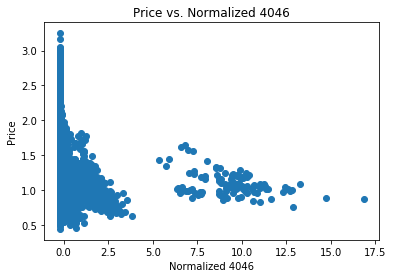

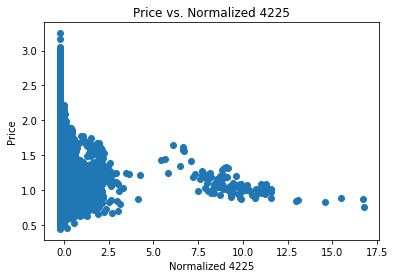

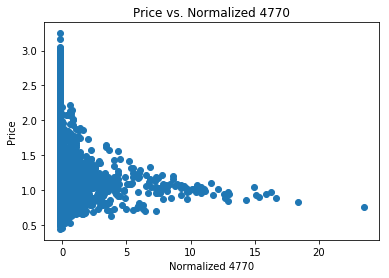

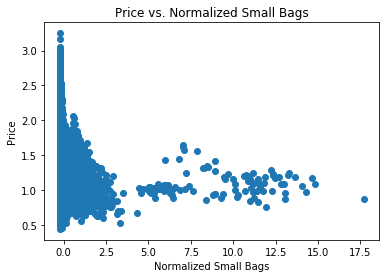

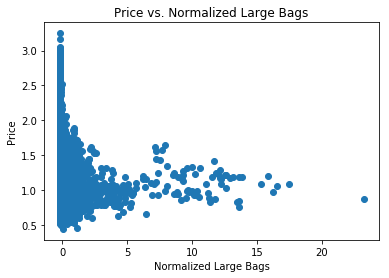

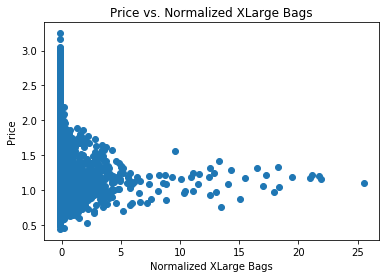

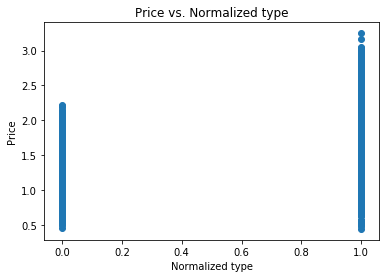

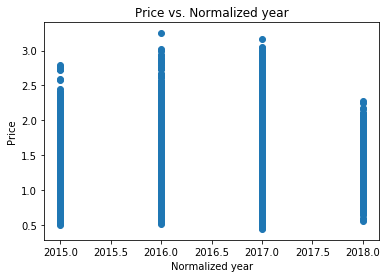

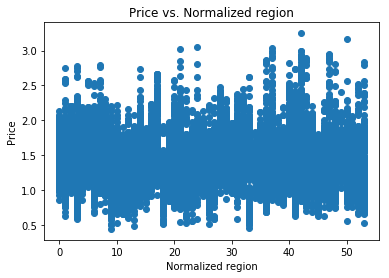

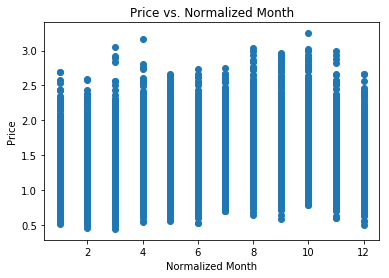

In [125]:
for label in training_set.columns.values:
    plt.scatter(training_set.loc[:, label],y_training_set.values)
    plt.xlabel('Normalized ' + label)
    plt.ylabel('Price')
    plt.title('Price vs. Normalized '+ label)
    plt.show()

Using an instance of LinearRegression, I indiviually regress each columns of the training_set against y_training_set and plot the best fit line.

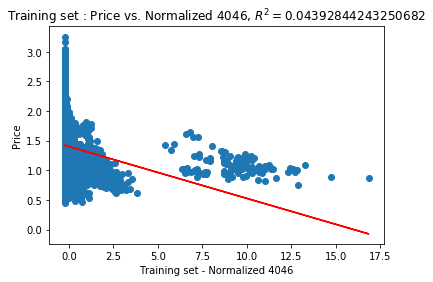

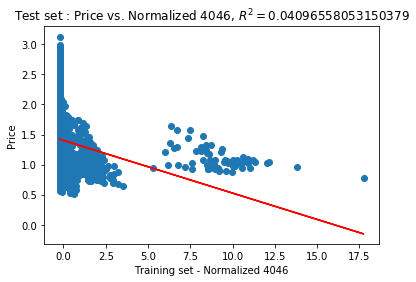

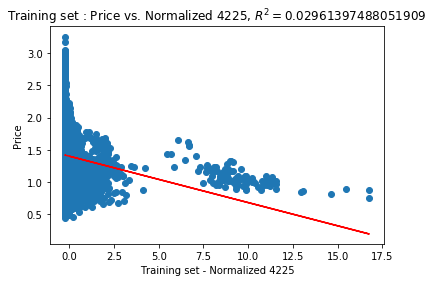

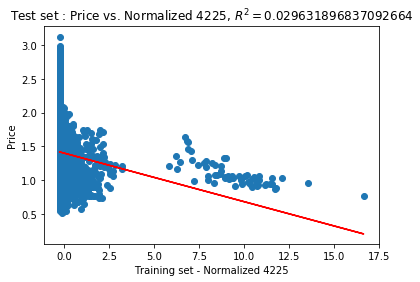

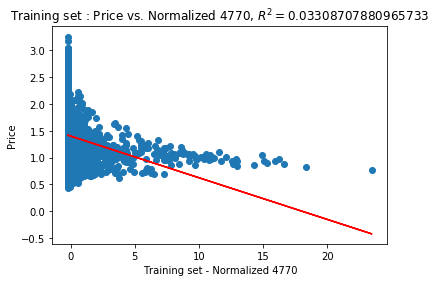

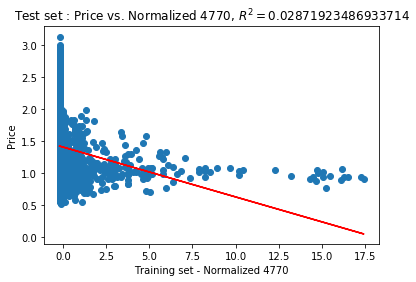

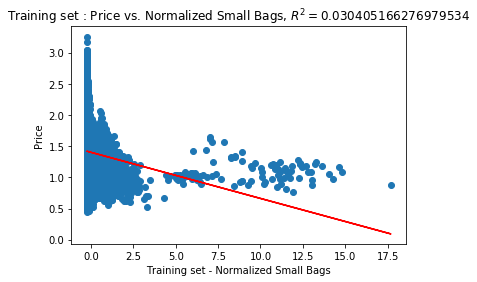

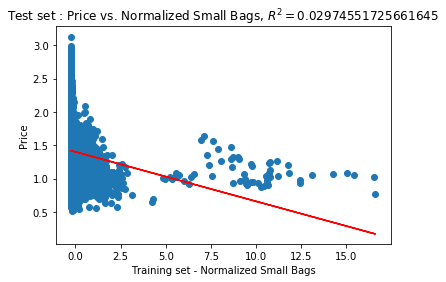

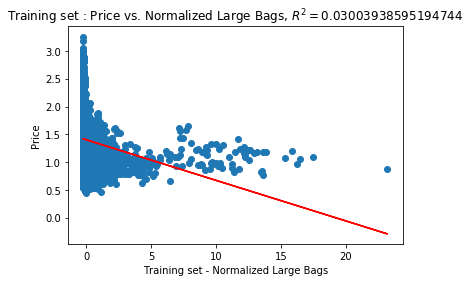

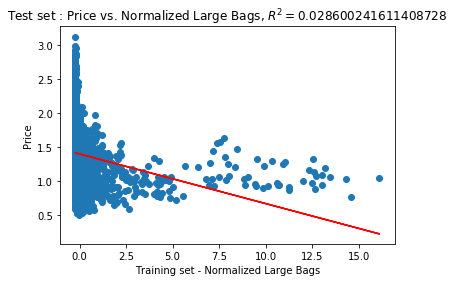

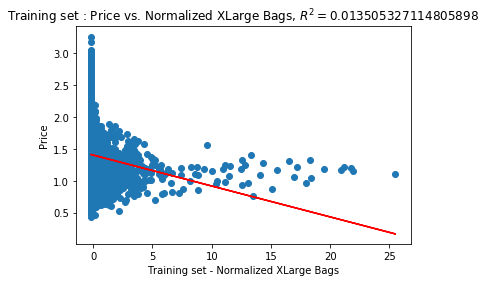

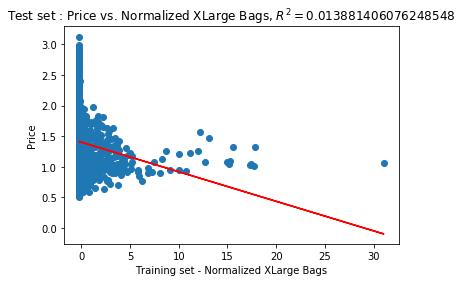

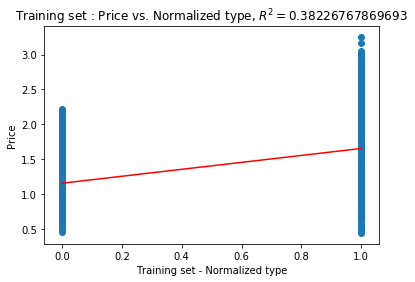

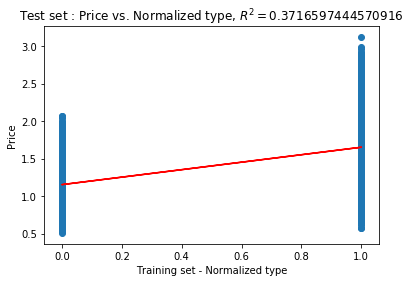

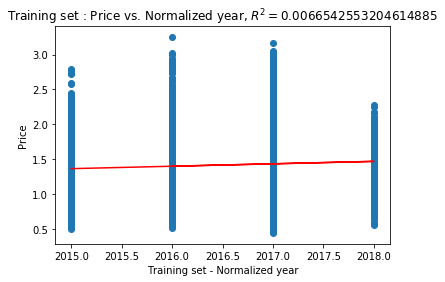

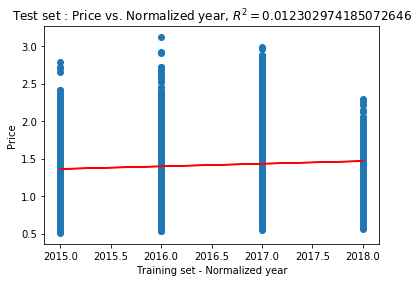

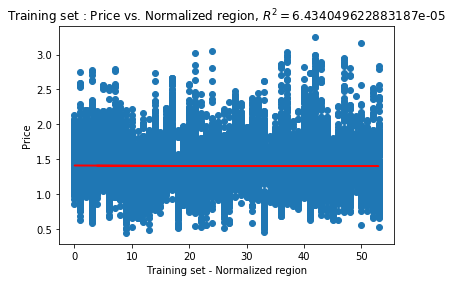

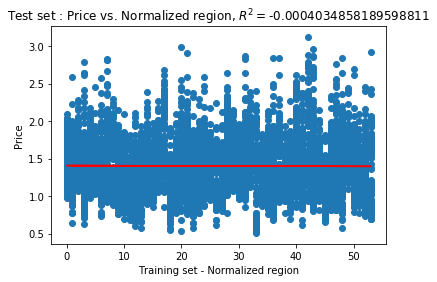

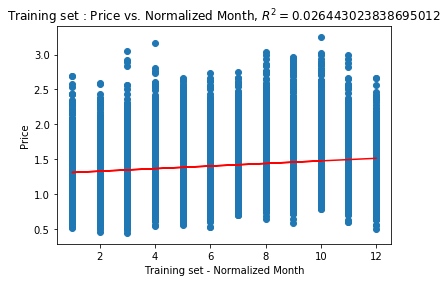

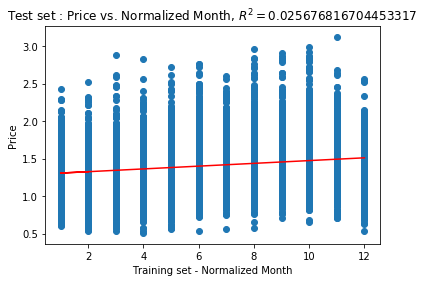

In [153]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
column_names = avocado_explanatory_variables.columns.values

for label in column_names:
    x_training = training_set.loc[:,label].values.reshape(-1,1)
    x_test = test_set.loc[:,label].values.reshape(-1,1)
    lr.fit(x_training,y_training_set)
    m = lr.coef_
    b = lr.intercept_
    
    plt.scatter(x_training,y_training_set.values)
    plt.plot(x_training, b + m * x_training, 'r-')
    plt.xlabel('Training set - Normalized ' + label)
    plt.ylabel('Price')
    plt.title('Training set : Price vs. Normalized '+ label + ', $R^2=$'
              +str(lr.score(x_training,y_training_set)))
    plt.show()
    
    plt.scatter(x_test,y_test_set.values)
    plt.plot(x_test, b + m * x_test, 'r-')
    plt.xlabel('Training set - Normalized ' + label)
    plt.ylabel('Price')
    plt.title('Test set : Price vs. Normalized '+ label + ', $R^2=$'
              +str(lr.score(x_test,y_test_set)))
    plt.show()

Overall, a linear model performs pretty poorly in each instance.

What if we just threw all the variables in a linear model? How would the linear model perform?

In [155]:
lr.fit(training_set,y_training_set)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Exercise 2.1

Print the coefficients of Linear Model with all variables. Also print the $R^2$ value of the model using the training set and test set.

In [157]:
print('The coefficients, except the intercept, are: ', lr.coef_,'\n')
print('The intercept is: ',lr.intercept_,'\n')
print('The R^2 from the training set is: ', str(lr.score(training_set,y_training_set)), '\n')
print('The R^2 from the training set is: ',str(lr.score(test_set,y_test_set)),'\n')

The coefficients, except the intercept, are:  [-1.10187388e-01  1.29751356e-01 -4.03433593e-02  1.17721989e-02
 -4.28189665e-02  2.80911867e-02  4.90349239e-01  4.96128258e-02
  3.41515586e-04  2.03294508e-02] 

The intercept is:  -99.00224118097495 

The R^2 from the training set is:  0.43862650738099485 

The R^2 from the training set is:  0.4368177291522999 



With more variables, the model performs a bit better! However, the model is far from perfect.

Could LASSO or Rigid regression help us? 

They're worth a try.

### LASSO and Rigid Regression

Using an instance of LASSO with alpha=1.0, I regress the columns of training_set against y_training_set.

In [162]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1)
lasso.fit(training_set,y_training_set)

print('The coefficients, except the intercept, are: ', lasso.coef_,'\n')
print('The intercept is: ',lasso.intercept_,'\n')
print('The R^2 from the training set is: ', str(lasso.score(training_set,y_training_set)), '\n')
print('The R^2 from the training set is: ',str(lasso.score(test_set,y_test_set)),'\n')

The coefficients, except the intercept, are:  [-0. -0. -0. -0. -0. -0.  0.  0. -0.  0.] 

The intercept is:  1.4029090339752623 

The R^2 from the training set is:  0.0 

The R^2 from the training set is:  -0.0006596549110005067 



As expected, LASSO doesn't help. It actually performs worse.

## Exercise 2.2 

Now it's your turn!

Using an instance of Rigid with alpha=1.0, regress the columns of training_set against y_training_set. Print the coefficients, interpet and $R^2$ with the training and test set. Comment on what you observe.

In [164]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(training_set,y_training_set)

print('The coefficients, except the intercept, are: ', ridge.coef_,'\n')
print('The intercept is: ',ridge.intercept_,'\n')
print('The R^2 from the training set is: ', str(ridge.score(training_set,y_training_set)), '\n')
print('The R^2 from the training set is: ',str(ridge.score(test_set,y_test_set)),'\n')

The coefficients, except the intercept, are:  [-1.10078413e-01  1.29566205e-01 -4.02865750e-02  1.17823896e-02
 -4.28061395e-02  2.80698541e-02  4.90185016e-01  4.96080758e-02
  3.41439014e-04  2.03292767e-02] 

The intercept is:  -98.99257969265307 

The R^2 from the training set is:  0.43862644951172347 

The R^2 from the training set is:  0.4368203433687191 



### Decision Trees
A linear model is just wrong for this problem.

What about using decision tree?

I use an instance of DecisionTreeRegressor with max depth 5 to regress training_set against y_training_set. 

I print the feature importance and $R^2$ value using training set and test set.

In [203]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=5,random_state=0)
dtr.fit(training_set,y_training_set)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [204]:
print('The R^2 value for training set is: ',dtr.score(training_set,y_training_set))
print('The R^2 value for test set is: ',dtr.score(test_set,y_test_set))
print('\n')
for feature,importance in zip(avocado_explanatory_variables.columns.values.tolist(),dtr.feature_importances_):
    print(feature,'variable has importance,', importance,'\n')

The R^2 value for training set is:  0.6056521638676196
The R^2 value for test set is:  0.5779059807061975


4046 variable has importance, 0.06912245763548412 

4225 variable has importance, 0.03952309504328819 

4770 variable has importance, 0.010503315325973091 

Small Bags variable has importance, 0.026184872080701815 

Large Bags variable has importance, 0.09648972470882122 

XLarge Bags variable has importance, 0.0 

type variable has importance, 0.6311670320069397 

year variable has importance, 0.05709575151372209 

region variable has importance, 0.0 

Month variable has importance, 0.06991375168506976 



I plot tree produced below.

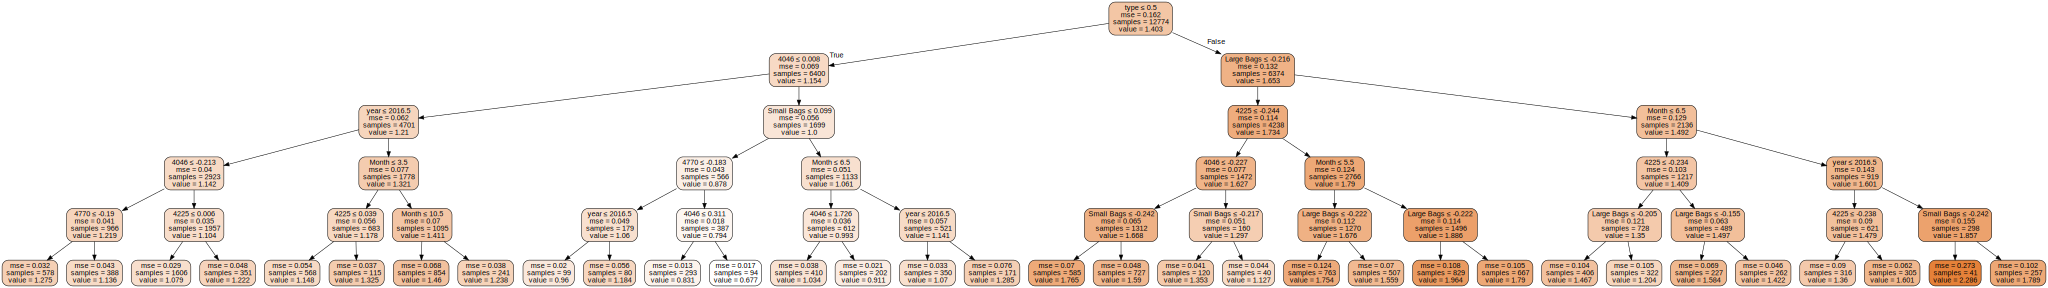

In [172]:
import graphviz 
import sklearn.tree as tree
dot_data = tree.export_graphviz(dtr, out_file=None, 
                         feature_names=column_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Increasing the max depth to 10, unsurprisingly, the model accuracy **increases**.

In [179]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=10,random_state=0)

In [198]:
dtr.fit(training_set,y_training_set)
print('The R^2 value for training set is: ',dtr.score(training_set,y_training_set))
print('The R^2 value for test set is: ',dtr.score(test_set,y_test_set))

The R^2 value for training set is:  0.9802507158317961
The R^2 value for test set is:  0.7537725044357136


### Random Forest Regression

Applying a random forest regression, we see similar successes.

In [200]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10,max_depth=10,max_features=5,random_state=0)
rf.fit(training_set,y_training_set)

print('The R^2 value for training set is: ',rf.score(training_set,y_training_set))
print('The R^2 value for test set is: ',rf.score(test_set,y_test_set))

The R^2 value for training set is:  0.8777751888606176
The R^2 value for test set is:  0.8128080819504587


## Exercise 2.3

Play around with the max depth parameter for the decision tree and random forest regression. What parameter gives the lowest error?

In [202]:
dtr = DecisionTreeRegressor(max_depth=20,random_state=0)
dtr.fit(training_set,y_training_set)
print('The R^2 value for training set is: ',dtr.score(training_set,y_training_set))
print('The R^2 value for test set is: ',dtr.score(test_set,y_test_set))
print('\n')

rf = RandomForestRegressor(n_estimators=10,max_depth=20,max_features=5,random_state=0)
rf.fit(training_set,y_training_set)

print('The R^2 value for training set is: ',rf.score(training_set,y_training_set))
print('The R^2 value for test set is: ',rf.score(test_set,y_test_set))

The R^2 value for training set is:  0.998872999265415
The R^2 value for test set is:  0.7447497788833228


The R^2 value for training set is:  0.9743836673981707
The R^2 value for test set is:  0.8645615084352922


# 3. Dimensionality Reduction: PCA

Below, I load the k-mers data set. 

In [ ]:
address = "2018-07-15T18"
kmers_training_set = functions.load_obj(address + "/train")
label_training_set = functions.load_obj(address + "/label_train")
kmers_test_set = functions.load_obj(address + "/test")
label_test_set = functions.load_obj(address + "/label_test")

I apply PCA without whitening to the k-mer training data set and reduce the number of features (dimensions) to 2.

In [ ]:
from sklearn.decomposition import PCA
pca_without_whitening = PCA(n_components=2,whiten=False)
pca_without_whitening.fit(kmers_training_set.todense())

kmers_training_pca_without_whitening = pca_without_whitening.transform(kmers_training_set.todense())

Below, I generate a two dimensional plot of PCA data.

In [ ]:
colours = ['red','blue']

plt.scatter(kmers_training_pca_without_whitening[:, 0],kmers_training_pca_without_whitening[:, 1],
            c=label_training_set, cmap=matplotlib.colors.ListedColormap(colours))
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.title('PCA plot of k-mer training data')
plt.show()

I apply learn PCA without whitening to the k-mer test data set and reduce the number of features (dimensions) to 2. I then plot test data.

In [ ]:
kmer_test_pca_without_whitening = pca_without_whitening.transform(kmers_test_set.todense())

In [ ]:
colours = ['red','blue']

plt.scatter(kmer_test_pca_without_whitening[:, 0],kmer_test_pca_without_whitening[:, 1],
            c=label_test_set, cmap=matplotlib.colors.ListedColormap(colours))
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.title('PCA plot of k-mer test data')
plt.show()

I then print the explained variance and singular values for each singular value 

In [ ]:
num = len(pca_without_whitening.explained_variance_)
for i in range(num):
    print('Component',i, 'explains',pca_without_whitening.explained_variance_[i],'variance')
    print('Component',i, 'has singular value', pca_without_whitening.singular_values_[i])

## Exercise 3.1

Using the variables kmers_training_set_dense and kmers_test_set_dense, apply PCA with whiten to the k-mer training and test data set. The variables are initialized in the cell below.

Store the reduced training in the variable, kmer_train_pca_with_whitening, and the reduced training in the variable, kmer_test_pca_with_whitening.

Run the below code to generate a plot. Comment on the differences between the whitened and unwhitened(???????) plots.

In [ ]:
kmers_training_set_dense = kmers_training_set.todense()
kmers_test_set_dense = kmers_test_set.todense()

pca_with_whitening = PCA(n_components=2,whiten=True)
kmers_training_pca_with_whitening = pca_with_whitening.fit_transform(kmers_training_set_dense)

kmer_test_pca_with_whitening = pca_with_whitening.transform(kmers_test_set_dense)

In [ ]:
colours = ['red','blue']

plt.scatter(kmers_training_pca_with_whitening[:, 0],kmers_training_pca_with_whitening[:, 1],
            c=label_training_set, cmap=matplotlib.colors.ListedColormap(colours))
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.title('PCA plot of k-mer training data')
plt.show()

colours = ['red','blue']

plt.scatter(kmer_test_pca_with_whitening[:, 0],kmer_test_pca_with_whitening[:, 1],
            c=label_test_set, cmap=matplotlib.colors.ListedColormap(colours))
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.title('PCA plot of k-mer test data')
plt.show()

# 4. Classification

In [ ]:
from sklearn.naive_bayes import GaussianNB
gNB=GaussianNB()
gNB.fit(kmers_training_set_dense,label_training_set)

In [ ]:
print(gNB.class_count_)
print(gNB.theta_)
print(gNB.sigma_)
print(gNB.score(kmers_training_set_dense,label_training_set))
print(gNB.score(kmers_test_set_dense,label_test_set))

#TODO: ADD SCORE TO NATIVE BAYES PRESENTATION

In [ ]:
from sklearn.metrics import confusion_matrix

predict_label_train_set = gNB.predict(kmers_training_set_dense)
predict_label_test_set = gNB.predict(kmers_test_set_dense)

print(confusion_matrix(label_training_set,predict_label_train_set))
print(confusion_matrix(label_test_set,predict_label_test_set))

## Exercise 4.1
Apply Native Bayes to the PCA data and print confusion matrix for test data

In [ ]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()
lgr.fit(kmers_training_set_dense,label_training_set)
print(lgr.coef_) #TODO: CHANGE IN PRESENTATION
print(lgr.intercept_)
print(lgr.score(kmers_training_set_dense,label_training_set))
print(lgr.score(kmers_test_set_dense,label_test_set))
predict_label_train_set_lgr = lgr.predict(kmers_training_set_dense)
predict_label_test_set_lgr = lgr.predict(kmers_test_set_dense)
print(confusion_matrix(label_training_set,predict_label_train_set_lgr))
print(confusion_matrix(label_test_set,predict_label_test_set_lgr))

## Exercise 4.2
Apply Logistic Regression to the PCA data and print confusion matrix for test data

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=None,random_state=0)
dtc.fit(kmers_training_set_dense,label_training_set)
#for feature,importance in zip(avocado_explanatory_variables.columns.values.tolist(),dtc.feature_importances_):
#    print(feature,'variable has importance,', importance,'\n')
print(dtc.feature_importances_)
print('The accuracy for training set is: ',dtc.score(kmers_training_set_dense,label_training_set))
print('The accuracy for test set is: ',dtc.score(kmers_test_set_dense,label_test_set))
predict_label_train_set_lgr = dtc.predict(kmers_training_set_dense)
predict_label_test_set_lgr =  dtc.predict(kmers_test_set_dense)
print(confusion_matrix(label_training_set,predict_label_train_set_lgr))
print(confusion_matrix(label_test_set,predict_label_test_set_lgr))

## Exercise 4.3

Apply a decision tree to the PCA data and print confusion matrix for test data

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                              n_estimators=50, random_state=0)
adaboost.fit(kmers_training_set_dense,label_training_set)
#for feature,importance in zip(avocado_explanatory_variables.columns.values.tolist(),dtc.feature_importances_):
#    print(feature,'variable has importance,', importance,'\n')
print(adaboost.feature_importances_)
print('The accuracy for training set is: ',adaboost.score(kmers_training_set_dense,label_training_set))
print('The accuracy for test set is: ',adaboost.score(kmers_test_set_dense,label_test_set))
predict_label_train_set_ada = adaboost.predict(kmers_training_set_dense)
predict_label_test_set_ada =  adaboost.predict(kmers_test_set_dense)
print(confusion_matrix(label_training_set,predict_label_train_set_ada))
print(confusion_matrix(label_test_set,predict_label_test_set_ada))

## Exercise 4.4
Apply Adaboost to the PCA data and print confusion matrix for test data

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(kmers_training_set_dense,label_training_set)
#for feature,importance in zip(avocado_explanatory_variables.columns.values.tolist(),dtc.feature_importances_):
#    print(feature,'variable has importance,', importance,'\n')
print('The accuracy for training set is: ',knn.score(kmers_training_set_dense,label_training_set))
print('The accuracy for test set is: ',knn.score(kmers_test_set_dense,label_test_set))
predict_label_train_set_knn = knn.predict(kmers_training_set_dense)
predict_label_test_set_knn =  knn.predict(kmers_test_set_dense)
print(confusion_matrix(label_training_set,predict_label_train_set_knn))
print(confusion_matrix(label_test_set,predict_label_test_set_knn))

## Exercise 4.5
Apply KNN to the PCA data and print confusion matrix for test data

# 5. Model Selection